# Reading images using skimage 

Scikit-image (skimage) is an image processing Python package that works with NumPy arrays which is a collection of algorithms for image processing.v Important properties of Skimage include:

- Simple and efficient tools for image processing and computer vision techniques. 
- Accessible to everybody and reusable in various contexts. 
- Built on the top of NumPy, SciPy, and matplotlib. 
- Open source, commercially usable – BSD license.

You can check the [Scikit-image documentation](https://scikit-image.org/docs/dev/api/api.html) for more information.

## Setting up skimage and importing libraries

You can install the scikit-image library with the helo of **`!pip install scikit-image`** command.  

In [1]:
# Install scikit-image
# !pip install scikit-image

In [2]:
# Importing modules from skimage to read and display images
import skimage
from skimage.io import imshow, imread, imsave
from skimage.transform import resize
import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print('skimage version:', skimage.__version__)

skimage version: 0.24.0


## Loading images

### Loading a grayscale image

Shape of the gray image: (226, 500, 3)
Image Matrix:
 [[90 90 90]
 [89 89 89]
 [88 88 88]
 ...
 [47 47 47]
 [45 45 45]
 [45 45 45]]


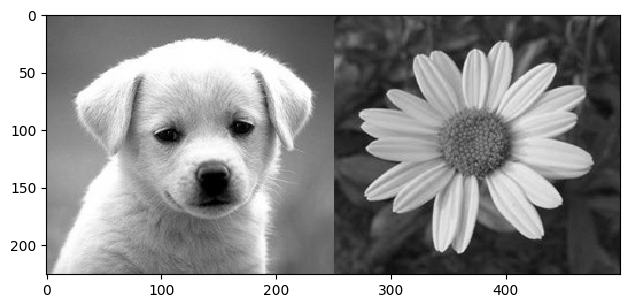

In [3]:
# Reading the image using its path
image_gray = imread('images/grayscale_image.jpg')

# Checking shape of image
print('Shape of the gray image:', image_gray.shape)

# Image matrix
print('Image Matrix:\n', image_gray[0])

# Plotting the image
imshow(image_gray)

In [4]:
# Calculate the number of pixels
print('Number of Pixels:', image_gray.shape[0] * image_gray.shape[1])

Number of Pixels: 113000


### Loading an RGB image

Shape of the RGB image: (360, 639, 3)
Image Matrix:
 [[48 23 19]
 [47 22 18]
 [49 21 18]
 ...
 [ 2  3 23]
 [ 2  3 23]
 [ 2  3 23]]


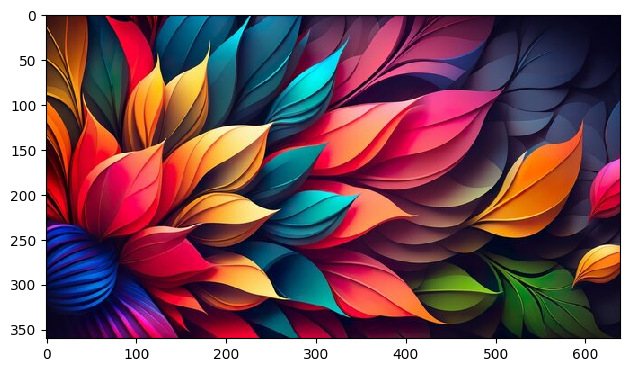

In [5]:
# reading the image using its path
image = imread('images/sample_image.jpg')

# Checking shape of image
print('Shape of the RGB image:', image.shape)

# Image matrix
print('Image Matrix:\n', image[0])

# Plotting the image
imshow(image)

### Printing different channels of RGB image

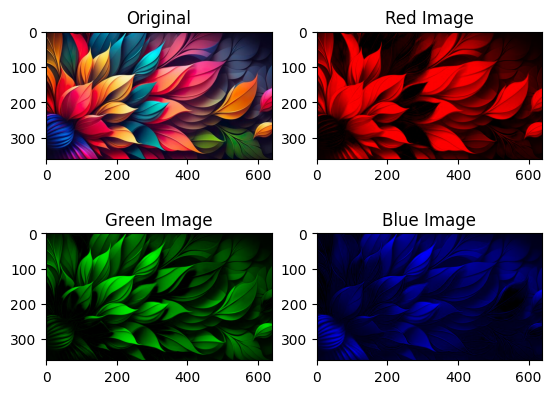

In [6]:
red_filter = [1, 0, 0]
green_filter = [0, 1, 0]
blue_filter = [0, 0, 1]

image1 = image * red_filter
image2 = image * green_filter
image3 = image * blue_filter

titles = ['Original', 'Red Image', 'Green Image', 'Blue Image']
images = [image, image1, image2, image3]
count = 4
 
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(images[i])
 
plt.show()

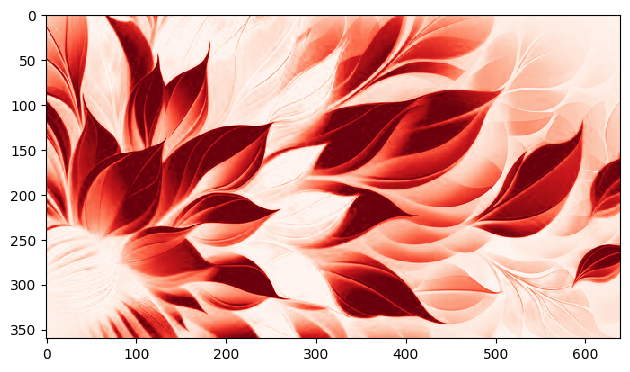

In [7]:
# individual channel using cmap
imshow(image[:,:,0], cmap = 'Reds')

## Loading RGBA image

Shape of the RGBA image: (340, 453, 4)
Image Matrix:
 [[ 57  62   8 160]
 [ 57  62   8 160]
 [ 57  62   8 160]
 ...
 [140 147  79 160]
 [140 147  79 160]
 [140 147  79 160]]


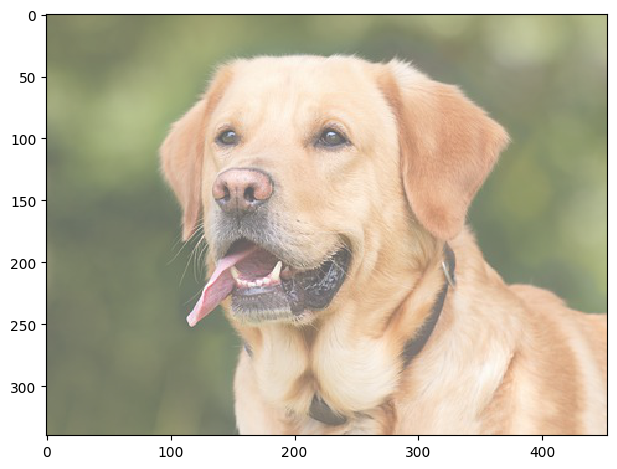

In [8]:
# loading image using imread
image_rgba = imread('images/mid_alpha.png')

# Checking shape of image
print('Shape of the RGBA image:', image_rgba.shape)

# Image matrix
print('Image Matrix:\n', image_rgba[0])

# Plotting the image
imshow(image_rgba)

alpha value:
 [[160 160 160 ... 160 160 160]
 [160 160 160 ... 160 160 160]
 [160 160 160 ... 160 160 160]
 ...
 [160 160 160 ... 160 160 160]
 [160 160 160 ... 160 160 160]
 [160 160 160 ... 160 160 160]]


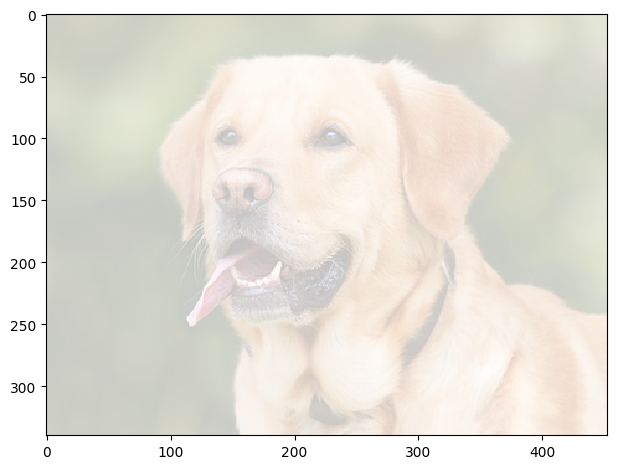

In [9]:
# print the alpha value
print('alpha value:\n', image_rgba[:,:,3])

# Change value of alpha channel
image_rgba[:,:,3] = image_rgba[:,:,3] - 100

# display new image with updated alpha
imshow(image_rgba)

### Loading MRI image

In [10]:
# loading library to read images
import nibabel as nib

print('nibabel version:', nib.__version__)

nibabel version: 5.2.1


In [11]:
image_mri = nib.load('images/sM00223_002.hdr')
image_mri = image_mri.get_fdata()

# Checking shape of image
print('Shape of the MRI image:', image_mri.shape)

# Squeeze the image
image_mri = image_mri.squeeze()

# Update shape
print('Shape of the MRI image:', image_mri.shape)

Shape of the MRI image: (256, 256, 54, 1)
Shape of the MRI image: (256, 256, 54)


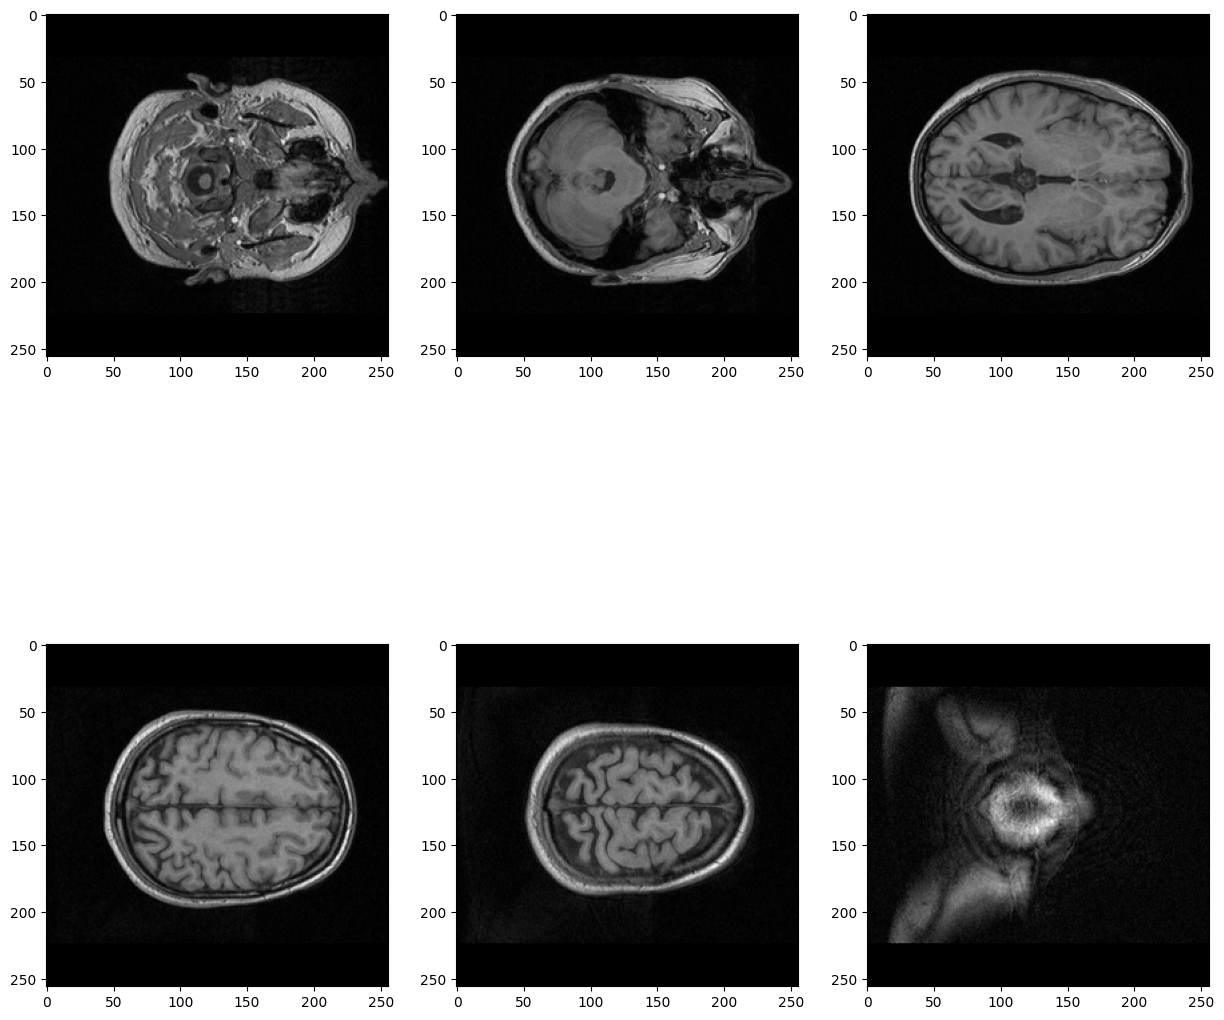

In [12]:
# Visualizing the MRI images
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))

ax[0,0].imshow(image_mri[:, :, 0], cmap = 'gray')
ax[0,1].imshow(image_mri[:, :, 11], cmap = 'gray')
ax[0,2].imshow(image_mri[:, :, 23], cmap = 'gray')
ax[1,0].imshow(image_mri[:, :, 37], cmap = 'gray')
ax[1,1].imshow(image_mri[:, :, 42], cmap = 'gray')
ax[1,2].imshow(image_mri[:, :, 51], cmap = 'gray')

### Loading multiple images

In [13]:
ls

 Volume in drive D is Dhruv
 Volume Serial Number is EC98-E25E

 Directory of D:\Data Science Bootcamp\6_Deep Learning\4_Digital Image Processing\1_Playing with Images

30-07-2024  21:30    <DIR>          .
30-07-2024  21:25    <DIR>          ..
30-07-2024  21:26    <DIR>          .ipynb_checkpoints
30-07-2024  21:30         2,645,078 1_reading_images.ipynb
30-07-2024  21:18           905,891 2_image_formats_conversion.ipynb
30-07-2024  21:19    <DIR>          images
               2 File(s)      3,550,969 bytes
               4 Dir(s)  236,525,654,016 bytes free


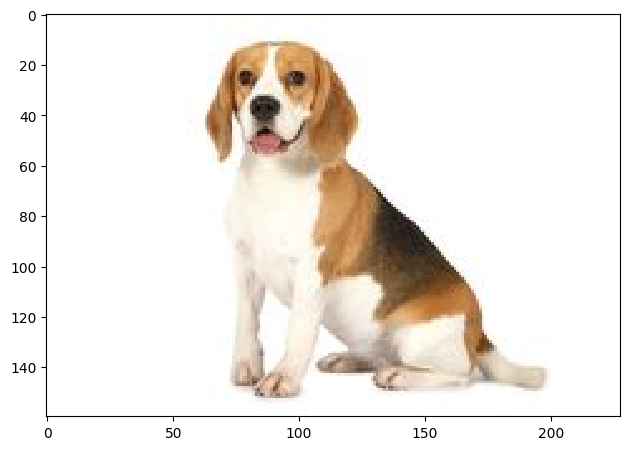

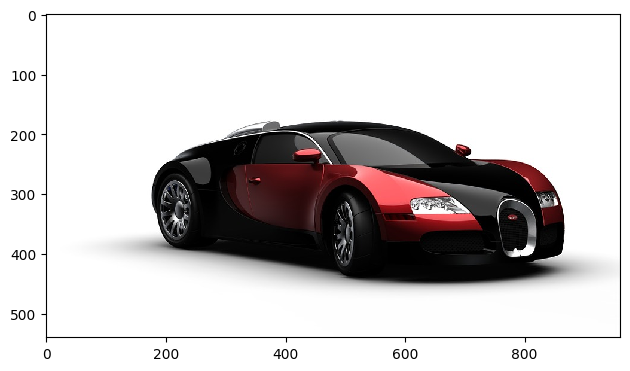

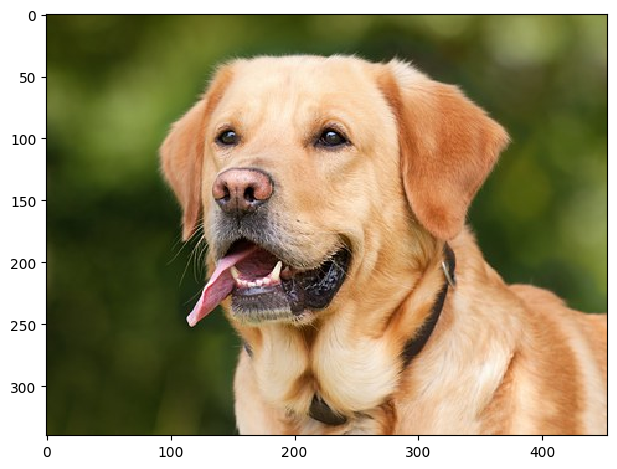

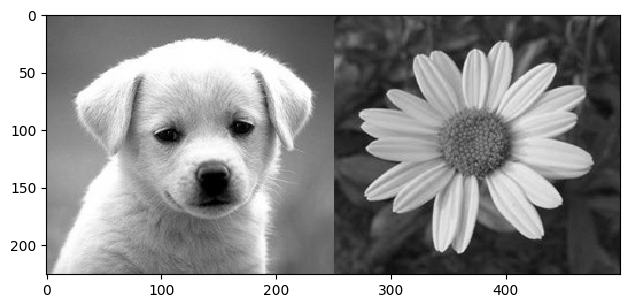

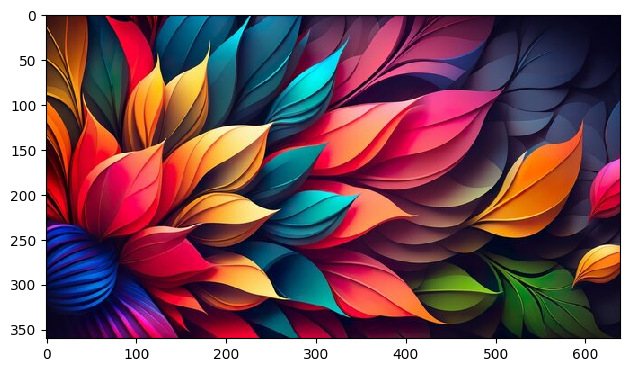

In [17]:
# reading multiple images
from glob import glob

image_name = glob('images/*.jpg')

image_ = []
for i in image_name:
  image = imread(i)
  imshow(image)
  plt.show()
  image_.append(image)